<a href="https://colab.research.google.com/github/bin1u0014/IntrotoAI/blob/main/classic_search_solution_student_41040_42172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Define a navigational search problem

In [1]:
# Import pandas library for using dataframes to handle data and name it as "pd"
import pandas as pd

# Import the module pyplot from matplotlib library for visualisations and name it as plt
import matplotlib.pyplot as plt

In [2]:
# Mount drive which is required when you need to read local files within this notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


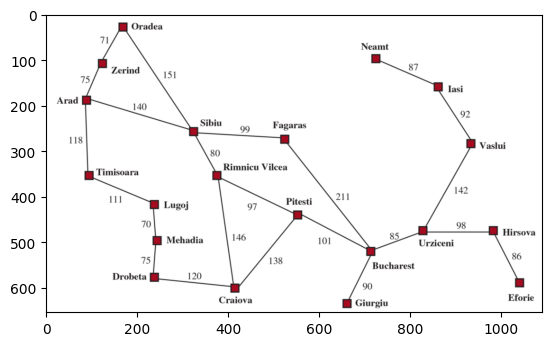

In [6]:
# Display the state graph in the given Romania problem using function imread() and imshow() in the pyplot module.
img = plt.imread('/content/gdrive/MyDrive/Lab2-pack/Romania-map.PNG')
plt.imshow(img)

In [9]:
# Load a csv file comtaining cities and their locations into a dataframe using function read_csv() in pd library. This file should be placed in the current folder. Otherwise, a path to the file location needs to be included in file name.
df_cities = pd.read_csv('/content/gdrive/MyDrive/Lab2-pack/cities_coordinates.csv' )

# View the output of this function call
df_cities.head()

,LocationName,LocationX,LocationY
0,Arad,91,492
1,Bucharest,400,327
2,Craiova,253,288
3,Drobeta,165,299
4,Eforie,562,293


In [11]:
# Read a file containing the correlation_matrix of cities in Romania problem using function read_csv() in pd library. This file should be placed in the current folder. Otherwise, a path to the file location needs to be included.
df_matrix = pd.read_csv("/content/gdrive/MyDrive/Lab2-pack/cities_correlation_matrix.csv")

# View the output of this function call
df_matrix.head()

,City Name,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,...,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
0,Arad,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,140,118,0,0,75
1,Bucharest,0,0,0,0,0,211,90,0.0,0,...,0,0,0,101,0,0,0,85,0,0
2,Craiova,0,0,0,120,0,0,0,0.0,0,...,0,0,0,138,146,0,0,0,0,0
3,Drobeta,0,0,120,0,0,0,0,0.0,0,...,75,0,0,0,0,0,0,0,0,0
4,Eforie,0,0,0,0,0,0,0,86.0,0,...,0,0,0,0,0,0,0,0,0,0


Build a dictionary to store the cities and their locations using the dataframe `df_cities`

In [12]:
# Define an empty dictionary 'cities'
cities = {}

# Extract the LocationName, LocationX and LocationY columns from the dataframe 'df_cities' and save them as 'name', locationX and locationY, respectively

name = df_cities["LocationName"]
locationX = df_cities["LocationX"]
locationY = df_cities["LocationY"]

# Create a series of city coordinates by using zip() function and x and y cooridnates (locationX and locationY).
'''
The zip() function in Python is used to combine multiple iterables (like lists or tuples) element-wise.
'''
location = zip(locationX, locationY)


# Populate the dictionary 'cities' by using a for-loop and method update()to add elements with each element being 'city name: city location'.
'''
The update() method is used to add or update key-value pairs in a dictionary.
It takes another dictionary or an iterable of key-value pairs (like a list of tuples) and merges it into the existing dictionary.
'''

for x1,x2 in zip(name, location):
    cities.update({x1:x2})

# View content of dictionary cities
cities

{'Arad': (91, 492),
 'Bucharest': (400, 327),
 'Craiova': (253, 288),
 'Drobeta': (165, 299),
 'Eforie': (562, 293),
 'Fagaras': (305, 449),
 'Giurgiu': (375, 270),
 'Hirsova': (534, 350),
 'Iasi': (473, 506),
 'Lugoj': (165, 379),
 'Mehadia': (168, 339),
 'Neamt': (406, 537),
 'Oradea': (131, 571),
 'Pitesti': (320, 368),
 'Rimnicu': (233, 410),
 'Sibiu': (207, 457),
 'Timisoara': (94, 410),
 'Urziceni': (456, 350),
 'Vaslui': (509, 444),
 'Zerind': (108, 531)}

Build a list whose element is a tuple (city 1, city 2, distance between cities 1 and 2) using the dataframe `df_matrix`

In [13]:
# Define an empy list, neighbours.

neighbours=[]

# Use for-loop to populate this list with the required tuples
for i in range (df_matrix.shape[0]):
    # Extract the ith row in the dataframe df_matrix using iloc() method
    x = df_matrix.iloc[i,:]

    # Extract the first column in x as the relationKey
    relationKey=(x.iloc[0])

    # Use a for-loop to loop through all city names
    for j in range (1, df_matrix.shape[1]):
        # Use if statement to filter the pairs of cities that are linked
        if (j>i and x.iloc[j] != 0 ):
          # Form a tuple using city name, a neighbour and the distance between this city pair
          temp_tuple = (relationKey, df_matrix.columns[j], int(x.iloc[j]))

          # Add this tuple to the list, neighbours, using append() method
          neighbours.append(temp_tuple)


In [14]:
# Display the above list and the numbers of its elements
print ('City neighbours data: {}'.format(neighbours))
print("\n{} number of elements in the list of city neighbours".format(len(neighbours)))

City neighbours data: [('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118), ('Arad', 'Zerind', 75), ('Bucharest', 'Fagaras', 211), ('Bucharest', 'Giurgiu', 90), ('Bucharest', 'Pitesti', 101), ('Bucharest', 'Urziceni', 85), ('Craiova', 'Drobeta', 120), ('Craiova', 'Pitesti', 138), ('Craiova', 'Rimnicu', 146), ('Drobeta', 'Mehadia', 75), ('Eforie', 'Hirsova', 86), ('Fagaras', 'Sibiu', 99), ('Hirsova', 'Urziceni', 98), ('Iasi', 'Neamt', 87), ('Iasi', 'Vaslui', 92), ('Lugoj', 'Mehadia', 70), ('Lugoj', 'Timisoara', 111), ('Oradea', 'Sibiu', 151), ('Oradea', 'Zerind', 71), ('Pitesti', 'Rimnicu', 97), ('Rimnicu', 'Sibiu', 80), ('Urziceni', 'Vaslui', 142)]

23 number of elements in the list of city neighbours


In [15]:
# Import a library NetworkX for using graph functions and name it as nx
import networkx as nx

In [16]:
# Create a graph of cities with the disctnace between pairs of cities as the edge weights
# Use the constructor Graph() of Graph class in nx library to create an instance of graph, G

G = nx.Graph()

# Use a method add_weighted_edges_from() in graph G to populate this graph using the list of city neighbours which is a list of 3-tuples.
G.add_weighted_edges_from(neighbours)

Display the graph

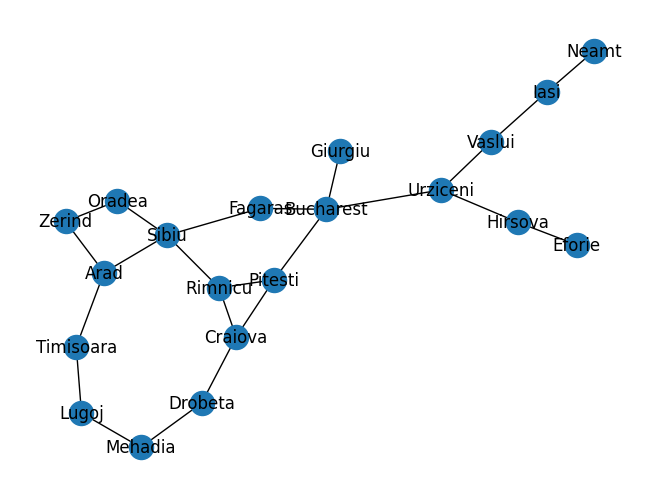

In [17]:
nx.draw(G, with_labels=True)
plt.show()

In [18]:
# Define the start state/city, source
source='Arad'

print('The start city is: {}'.format(source))

# Define the goal state/city. goal
goal='Bucharest'

print('The goal city is: {}'.format(goal))

The start city is: Arad
The goal city is: Bucharest


## Implementation of an informed search algorithm (Greedy best first search (GBFS) agorithm) and apply it to solve a problem

Implementation of greedy best first search (GBFS) algorithm. The forntier is implemented as a priority queue. The priority value is the distance from the current node to the goal node, defined by the heurisitc function.

In [19]:
# Define the heuristic function if it has not been defined before

# Import library numpy for some basic functions, such as sqrt(), and give an alias as np
import numpy as np

# Define a function to calculate Euclidean disctance between two pairs u and v
def heuristic(u, v):   # u and v are tuples (two coordinates)
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(u, v)))

Implement the GBFS algorithm by defining the path-finding function based on this algorithm.

In [20]:
# Define a class PriorityQueue

# Import heapq module which provides an implementation of the heap queue algorithm
import heapq

class PriorityQueue:
    def __init__(self):
        self._heap = []

    def push(self, item, priority):
        """
        Add an item to the priority queue with the given priority.

        Parameters:
            item: The item to add to the queue.
            priority: The priority of the item. Lower numbers indicate higher priority.
        """
        heapq.heappush(self._heap, (priority, item))

    def pop(self):
        """
        Remove and return the item with the highest priority (lowest priority number).

        Returns:
            The item with the highest priority.

        Raises:
            IndexError: If the priority queue is empty.
        """
        if self.is_empty():
            raise IndexError("pop from an empty priority queue")
        return heapq.heappop(self._heap)[1]

    def peek(self):
        """
        Return the item with the highest priority without removing it.

        Returns:
            The item with the highest priority.

        Raises:
            IndexError: If the priority queue is empty.
        """
        if self.is_empty():
            raise IndexError("peek from an empty priority queue")
        return self._heap[0][1]

    def is_empty(self):
        """
        Check if the priority queue is empty.

        Returns:
            True if the priority queue is empty, False otherwise.
        """
        return len(self._heap) == 0

    def __len__(self):
        """
        Return the number of items in the priority queue.

        Returns:
            The number of items in the queue.
        """
        return len(self._heap)


In [21]:
def gbfs_path(G, start, goal):
    """Find a path from start to goal using greedy best first Search."""
    # Check the start node
    print('start node: {}'.format(start))

    # Initialise a priority queue object to be the frontier -- an empty priority list
    pq = PriorityQueue()
    # Initialise the frontier by the start location, it's path
    pq.push((start,[start]),heuristic(cities[start],cities[goal]))

    # initialise the explored set to be an empty set
    visited = set()

    index = 0
    while pq:
        print('Interation {}'.format(index))
        # Check the highest priority node in the frontier before expansion if the frontie is not empty
        print('A new expansion. Element with the highest priority in the frontier before expansions:')
        print(pq.peek())

        (vertex, path) = pq.pop()
        index = index +1

        # Check the node chosen to expand
        print('Node chosen to expand: {}'. format(vertex))

        # Check the frontier after removing a node to expand
        if not (pq.is_empty()):
            print('Element with the highest priority in the frontie after removing a node {} to expand:'.format(vertex))
            print(pq.peek())
        else: print("frontie is empty")

        if vertex in visited:
            continue
        visited.add(vertex)

        # Check the explored set or the closed list again after adding a node, visited
        print('Elements in the closed list after adding a node {}:'.format(vertex))
        for element in visited:
            print(element)

        if vertex == goal:
                return path

        for neighbor in G[vertex]:
            print("neighbor is ", neighbor)
            if neighbor in visited:
                continue
            pq.push((neighbor, path + [neighbor]), heuristic(cities[neighbor],cities[goal]))

            # Check the frontier after adding a node
            print('Element with the highest priority in the frontie after adding a neighbour node {}:'.format(neighbor))
            print(pq.peek())

    return None  # Return None if no path is found

Apply the GBFS algorithm to find a solution by calling the path-finding function.

In [22]:
# Find a path in G from source node  to goal node using GBFS algorithm by calling the self-defined function gbfs_path()

path = gbfs_path(G, source, goal)

# Display the solution path with a prompt "Path from source node  to goal node using GBFS algorithm:"
print("Path from source node to goal node using GBFS algorithm:", path)

start node: Arad
Interation 0
A new expansion. Element with the highest priority in the frontier before expansions:
('Arad', ['Arad'])
Node chosen to expand: Arad
frontie is empty
Elements in the closed list after adding a node Arad:
Arad
neighbor is  Sibiu
Element with the highest priority in the frontie after adding a neighbour node Sibiu:
('Sibiu', ['Arad', 'Sibiu'])
neighbor is  Timisoara
Element with the highest priority in the frontie after adding a neighbour node Timisoara:
('Sibiu', ['Arad', 'Sibiu'])
neighbor is  Zerind
Element with the highest priority in the frontie after adding a neighbour node Zerind:
('Sibiu', ['Arad', 'Sibiu'])
Interation 1
A new expansion. Element with the highest priority in the frontier before expansions:
('Sibiu', ['Arad', 'Sibiu'])
Node chosen to expand: Sibiu
Element with the highest priority in the frontie after removing a node Sibiu to expand:
('Timisoara', ['Arad', 'Timisoara'])
Elements in the closed list after adding a node Sibiu:
Arad
Sibiu
n

## Implementation of the Uniform cost search (UCS) algorithm and apply it to solve a problem

Implementation of uniform cost search (UCS) algorithm. The forntier is implemented as a priority queue. The priority value is the path cost which is the distance from the root node to the current node. The Priority value is the path cost.

Implement the UCS algorithm by defining the path-finding function based on this algorithm.

In [23]:
def ucs_path(G, start, goal):
    """Find a path from start to goal using uniform cost Search."""

    # Check the start node
    print('start node: {}'.format(start))

    pq = PriorityQueue()
    pq.push((start,[start]),0)

    visited = set()

    index = 0
    while pq:
        print('Interation {}'.format(index))
        # Check the highest priority node in the frontier before expansion if the frontie is not empty
        print('A new expansion. Element with the highest priority in the frontier before expansions:')
        print(pq.peek())

        (vertex, path) = pq.pop()
        index = index +1

        # Check the node chosen to expand
        print('Node chosen to expand: {}'. format(vertex))

        # Check the frontier after removing a node to expand
        if not (pq.is_empty()):
            print('Element with the highest priority in the frontie after removing a node {} to expand:'.format(vertex))
            print(pq.peek())
        else: print("frontie is empty")


        if vertex in visited:
            continue
        visited.add(vertex)

        # Check the closed list again after adding a node, visited
        print('Elements in the closed list after adding a node {}:'.format(vertex))
        for element in visited:
            print(element)

        if vertex == goal:
                return path

        for neighbor in G[vertex]:
            print("neighbor is ", neighbor)
            if neighbor in visited:
                continue
            pq.push((neighbor, path + [neighbor]),nx.path_weight(G, path + [neighbor],'weight'))

            # Check the frontier after adding a node
            print('Element with the highest priority in the frontie after adding a neighbour node {}:'.format(neighbor))
            print(pq.peek())

    return None  # Return None if no path is found


Apply UCS algorithm to find a solution by calling the path-finding function.

In [ ]:
# Find a path in G from source node  to goal node using uniform cost search algorithm by calling self-defined ucs_path() function.
path = ucs_path(G, source, goal)

# Display the solution path with a prompt "Path from source node  to goal node using UCS:"
print("Path from source node  to goal node using UCS:", path)

start node: Arad
A new expansion. Element with the highest priority in the frontier before expansions:
('Arad', ['Arad'])
Node chosen to expand: Arad
frontie is empty
Elements in the closed list after adding a node Arad:
Arad
neighbor is  Sibiu
Element with the highest priority in the frontie after adding a neighbour node Sibiu:
('Sibiu', ['Arad', 'Sibiu'])
neighbor is  Timisoara
Element with the highest priority in the frontie after adding a neighbour node Timisoara:
('Timisoara', ['Arad', 'Timisoara'])
neighbor is  Zerind
Element with the highest priority in the frontie after adding a neighbour node Zerind:
('Zerind', ['Arad', 'Zerind'])
A new expansion. Element with the highest priority in the frontier before expansions:
('Zerind', ['Arad', 'Zerind'])
Node chosen to expand: Zerind
Element with the highest priority in the frontie after removing a node Zerind to expand:
('Timisoara', ['Arad', 'Timisoara'])
Elements in the closed list after adding a node Zerind:
Zerind
Arad
neighbor is

## Implementation of an informed search algorithm (A star (A*) algorithm) and apply it to solve a problem

Implementation of A start algorithm. The forntier is implemented as a priority queue. The priority value is the path cost plus the distance from the current node to the goal node, which is defined by a heuristic function.

Implement the A star algorithm by defining the path-finding function based on this algorithm.

In [ ]:
def my_astar_path(G, start, goal):
    """Find a path from start to goal using A star Search algorithm."""
    # Check the start node
    print('start node: {}'.format(start))

    pq = PriorityQueue()
    pq.push((start,[start]),0+heuristic(cities[start],cities[goal]))
    visited = set()

    index = 0
    while pq:
        print('Interation {}'.format(index))
        # Check the highest priority node in the frontier before expansion if the frontie is not empty
        print('A new expansion. Element with the highest priority in the frontier before expansions:')
        print(pq.peek())

        (vertex, path) = pq.pop()
        index = index +1

        # Check the node chosen to expand
        print('Node chosen to expand: {}'. format(vertex))

        # Check the frontier after removing a node to expand
        if not (pq.is_empty()):
            print('Element with the highest priority in the frontie after removing a node {} to expand:'.format(vertex))
            print(pq.peek())
        else: print("frontie is empty")

        if vertex in visited:
            continue
        visited.add(vertex)

        # Check the closed list again after adding a node, visited
        print('Elements in the closed list after adding a node {}:'.format(vertex))
        for element in visited:
            print(element)

        if vertex == goal:
                return path

        for neighbor in G[vertex]:
            #print("neighbor is ", neighbor)
            if neighbor in visited:
                continue

            pq.push((neighbor, path + [neighbor]), nx.path_weight(G, path + [neighbor],'weight')+heuristic(cities[neighbor],cities[goal]))

            # Check the frontier after adding a node
            print('Element with the highest priority in the frontie after adding a neighbour node {}:'.format(neighbor))
            print(pq.peek())

    return None  # Return None if no path is found


Apply A star algorithm to find a solution by calling the path-finding function.
Two options:
* Use self-defined path-finding function my_astar_path()
* Use a built-in function in Networkx libary (nx) for validation of the self-defined algorithm function

In [ ]:
# Find a path in G from source node  to goal node using A star algorithm by calling a self-defined function my_astar_path()
path = my_astar_path(G, source, goal)

# Display the solution path with a prompt "Path from source node  to goal node using A star algorithm:"
print("Path from source node  to goal node using A star algorithm:", path)

start node: Arad
A new expansion. Element with the highest priority in the frontier before expansions:
('Arad', ['Arad'])
Node chosen to expand: Arad
frontie is empty
Elements in the closed list after adding a node Arad:
Arad
Element with the highest priority in the frontie after adding a neighbour node Sibiu:
('Sibiu', ['Arad', 'Sibiu'])
Element with the highest priority in the frontie after adding a neighbour node Timisoara:
('Sibiu', ['Arad', 'Sibiu'])
Element with the highest priority in the frontie after adding a neighbour node Zerind:
('Sibiu', ['Arad', 'Sibiu'])
A new expansion. Element with the highest priority in the frontier before expansions:
('Sibiu', ['Arad', 'Sibiu'])
Node chosen to expand: Sibiu
Element with the highest priority in the frontie after removing a node Sibiu to expand:
('Zerind', ['Arad', 'Zerind'])
Elements in the closed list after adding a node Sibiu:
Sibiu
Arad
Element with the highest priority in the frontie after adding a neighbour node Fagaras:
('Fagar

In [ ]:
# Validate the results of A* search by comparing the results from calling function astar_path() from nx library, whose signature is astar_path(G, source, goal, heuristic=None, weight='weight', *, cutoff=None). You need to set heuristic to be the self-defined heuristic function name

# Redefine the heuristic function as heuristic_location_name() to calculate euclidean distance between two cities (whose names are cn1 and cn1) for using function astar_path() from nx library
def heuristic_location_name(cn1, cn2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(cities[cn1], cities[cn2])))

path = nx.astar_path(G, source, goal, heuristic=heuristic_location_name)

# Display the solution as a path of nodes or a sequence of cities
print("A* path:", path)

A* path: ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']


## Implementation of a blind/uninformed search (Breadth first search (BFS)) algorithm and apply it to solve a problem.

Implementation of BFS algorithm by defining the path-finding function based on this algorithm. The frontier is implemented by a FIFO queue.

In [ ]:
# Import deque from python module collections.
from collections import deque

def bfs_path(G, start, goal):
    """Find a path in G from start to goal using breadth-First Search."""

    # Check the start node
    print('start node: {}'.format(start))

    queue = deque([(start,[start])])

    visited = set()
    index = 0
    while queue:
        print ('iteration {}'.format(index))
        # Check the frontier, which is queue, before expansion
        print('A new expansion. Elements in the frontie before expansion:')
        for i in range(len(queue)):
            print(queue[i])

        (vertex, currentPath) = queue.popleft()
        index =index +1

        # Check the node chosen to expand
        print('Node chosen to expand: {}'. format(vertex))

        # Check the frontier after removing a node to expand
        print('Elements in the frontie after removing a node {} to expand:'.format(vertex))
        for i in range(len(queue)):
            print(queue[i])

        if vertex in visited:
            continue

        visited.add(vertex)

        # Check the closed list again after adding a node, visited
        print('Elements in the closed list after adding a node {}:'.format(vertex))
        for element in visited:
            print(element)

        new_nodes = []
        for element in G.neighbors(vertex):
            new_nodes.append(element)
        new_nodes.sort()


        for neighbor in new_nodes:
            flag = True
            print("neighbor is ", neighbor)

            if neighbor in visited:
                continue
            if neighbor == goal:
                return currentPath + [neighbor]

            for node in queue:
              if neighbor == node[0]:
                flag = False
            if flag:
                queue.append((neighbor, currentPath + [neighbor]))

            # Check the frontier after adding a node
            print('Elements in the frontie after processing a neighbour node {}:'.format(neighbor))
            for i in range(len(queue)):
                print(queue[i])

    return None  # Return None if no path is found

Apply BFS algorithm to find a solution by calling the path-finding function.

In [ ]:
# Find a path in G from source node to goal node by calling the self-defined function bfs_path()
path = bfs_path(G, source, goal)

# Display the path found by bfs algorithm with a prompt "Path from source node  to goal node:"
print("Path from source node  to goal node:", path)

start node: Arad
iteration 0
A new expansion. Elements in the frontie before expansion:
('Arad', ['Arad'])
Node chosen to expand: Arad
Elements in the frontie after removing a node Arad to expand:
Elements in the closed list after adding a node Arad:
Arad
neighbor is  Sibiu
Elements in the frontie after processing a neighbour node Sibiu:
('Sibiu', ['Arad', 'Sibiu'])
neighbor is  Timisoara
Elements in the frontie after processing a neighbour node Timisoara:
('Sibiu', ['Arad', 'Sibiu'])
('Timisoara', ['Arad', 'Timisoara'])
neighbor is  Zerind
Elements in the frontie after processing a neighbour node Zerind:
('Sibiu', ['Arad', 'Sibiu'])
('Timisoara', ['Arad', 'Timisoara'])
('Zerind', ['Arad', 'Zerind'])
iteration 1
A new expansion. Elements in the frontie before expansion:
('Sibiu', ['Arad', 'Sibiu'])
('Timisoara', ['Arad', 'Timisoara'])
('Zerind', ['Arad', 'Zerind'])
Node chosen to expand: Sibiu
Elements in the frontie after removing a node Sibiu to expand:
('Timisoara', ['Arad', 'Timiso

## Implementation of a blind/uninformed search (Depth first search (DFS)) algorithm and apply it to solve a problem

Implementation of DFS algorithm by defining the path-finding function based on this algorithm. The Frontier is implemented using a stack based on dequeu

In [ ]:
# Import deque from python module collections. deque is a generalization of stacks and queues in Python.
from collections import deque

def dfs_path(G, start, goal):
    """Find a path from start to goal using Depth-First Search."""

    # Check the start node
    print('start node: {}'.format(start))

    stack = deque([(start,[start])])
    visited = set()               # graph version

    index = 0
    while stack:
        print('Interation {}'.format(index))
        # Check the frontier, which is stack, before expansion
        print('A new expansion. Elements in the frontie before expansion:')
        for i in range(len(stack)):
            print(stack[i])

        (vertex, path) = stack.pop()
        index = index +1
        # Check the node chosen to expand
        print('Node chosen to expand: {}'. format(vertex))

        # Check the frontier after removing a node to expand
        print('Elements in the frontie after removing a node {} to expand:'.format(vertex))
        for i in range(len(stack)):
            print(stack[i])

        if vertex in visited:
            continue
        visited.add(vertex)

        # Check the closed list again after adding a node, visited
        print('Elements in the closed list after adding a node {}:'.format(vertex))
        for element in visited:
            print(element)

        new_nodes = []
        for element in G.neighbors(vertex):
            new_nodes.append(element)
        new_nodes.sort()
        new_nodes.reverse()


        for neighbor in new_nodes:
            flag = True
            print("neighbor is ", neighbor)
            if neighbor in visited:
                continue
            if neighbor == goal:               # Early goal test which tests whether a node is a goal node before adding it to the frontier.
                return path + [neighbor]

            for node in stack:
              if neighbor == node[0]:
                flag = False
            if flag:
                stack.append((neighbor, path + [neighbor]))

            # Check the frontier after adding a node
            print('Elements in the frontie after adding a neighbour node {}:'.format(neighbor))
            for i in range(len(stack)):
                print(stack[i])

    return None  # Return None if no path is found

Apply DFS algorithm to find a solution by calling the path-finding function.

In [ ]:
# Find a path in G from source node to goal node using DFS by calling the self0defined function dfs_path()
path = dfs_path(G, source, goal)

# Display the path found by dfs algorithm with a prompt "Path from source node to goal node using dfs algorithm is :"
print("Path from source node to goal node using dfs algorithm is :", path)

start node: Arad
Interation 0
A new expansion. Elements in the frontie before expansion:
('Arad', ['Arad'])
Node chosen to expand: Arad
Elements in the frontie after removing a node Arad to expand:
Elements in the closed list after adding a node Arad:
Arad
neighbor is  Zerind
Elements in the frontie after adding a neighbour node Zerind:
('Zerind', ['Arad', 'Zerind'])
neighbor is  Timisoara
Elements in the frontie after adding a neighbour node Timisoara:
('Zerind', ['Arad', 'Zerind'])
('Timisoara', ['Arad', 'Timisoara'])
neighbor is  Sibiu
Elements in the frontie after adding a neighbour node Sibiu:
('Zerind', ['Arad', 'Zerind'])
('Timisoara', ['Arad', 'Timisoara'])
('Sibiu', ['Arad', 'Sibiu'])
Interation 1
A new expansion. Elements in the frontie before expansion:
('Zerind', ['Arad', 'Zerind'])
('Timisoara', ['Arad', 'Timisoara'])
('Sibiu', ['Arad', 'Sibiu'])
Node chosen to expand: Sibiu
Elements in the frontie after removing a node Sibiu to expand:
('Zerind', ['Arad', 'Zerind'])
('Tim